In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
titanic_data = pd.read_csv(r"D:\Kawa\Kuliah\Semester 8\Kaggle\titanic\data\train.csv")
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

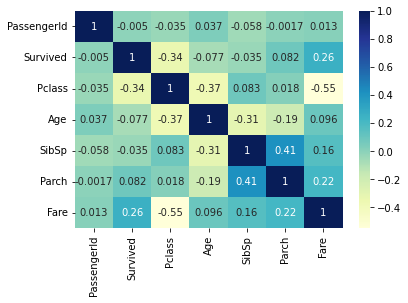

In [75]:
sns.heatmap(titanic_data.corr(), annot=True, cmap = "YlGnBu")

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]): #tiga column ini merupakan yg akan dishuffle tapi equal distributed
    test_set = titanic_data.loc[test_indices]
    train_set = titanic_data.loc[train_indices]

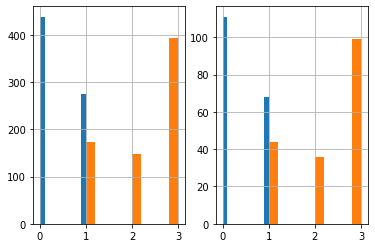

In [77]:
plt.subplot(1,2,1)
train_set["Survived"].hist()
train_set["Pclass"].hist()
# train_set["Sex"].hist()

plt.subplot(1,2,2)
test_set["Survived"].hist()
test_set["Pclass"].hist()
# test_set["Sex"].hist()

plt.show()

In [78]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 802 to 657
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          568 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [79]:
# PIPELINE INI BERFUNGSI UNTUK NGEFILL VALUE PADA FITUR AGE

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeFiller(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [80]:
# PIPELINE INI BERFUNGSI UNTUK ENCODE FITUR EMBARKED DAN GENDER (categorical)

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[["Sex"]]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [81]:
# PIPELINE INI BERFUNGSI UNTUK DROP FITUR

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [82]:
# BUAT URUTAN PIPELINE

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("agefiller", AgeFiller()),
                    ("featureencoder", FeatureEncoder()),
                    ("FeatureDropper", FeatureDropper())])

In [83]:
train_set = pipeline.fit_transform(train_set)

In [84]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 802 to 657
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [85]:
from sklearn.preprocessing import StandardScaler

X = train_set.drop(["Survived"], axis=1)
Y = train_set["Survived"]

scaler = StandardScaler()  # untuk menghiilangkan mean dan menscale unit variance
X_data = scaler.fit_transform(X)    # konversi seluruh fitur selain "survived" ke array, tujuannya utk mempermudah model mentrain data
Y_data = Y.to_numpy()   # konversi fitur survived ke numpy.array

In [86]:
X_data

array([[ 1.39670461, -1.56828591, -1.44792001, ...,  0.60547724,
        -0.73561236,  0.73561236],
       [ 1.49722164,  0.82789342,  0.        , ..., -1.65158975,
        -0.73561236,  0.73561236],
       [-1.44870067, -0.37019624, -0.06005659, ...,  0.60547724,
         1.35941164, -1.35941164],
       ...,
       [ 0.57710417,  0.82789342,  0.40256456, ...,  0.60547724,
        -0.73561236,  0.73561236],
       [ 0.84772696, -1.56828591,  1.55911741, ...,  0.60547724,
        -0.73561236,  0.73561236],
       [ 0.83612884,  0.82789342,  0.17125398, ..., -1.65158975,
         1.35941164, -1.35941164]])

In [87]:
# menggunakan random forest karena bentuk data yg memiliki banyak decision tree, alternatif svm, knearest
"""gridsearchCV: CV adalah cross validatin, ex membagi data train jadi 10 "folds", train 9 folds and test and evaluate dengan 1 folds sisanya. 
Di iterasi sampai seluruh folds sudah menjadi data test.
gridsearch: mencari optimal hyper parameter(neighbours, weighting, dll)""" 



'gridsearchCV: CV adalah cross validatin, ex membagi data train jadi 10 "folds", train 9 folds and test and evaluate dengan 1 folds sisanya. \nDi iterasi sampai seluruh folds sudah menjadi data test.\ngridsearch: mencari optimal hyper parameter(neighbours, weighting, dll)'

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()

hyper_param_grid = [
    {"n_estimators": [200, 500, 800], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(classifier, hyper_param_grid, cv=3, scoring='accuracy', return_train_score=True) #cv itu  jumlah folds
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [200, 500, 800]}],
             return_train_score=True, scoring='accuracy')

In [89]:
final_classifier = grid_search.best_estimator_

In [90]:
final_classifier

RandomForestClassifier(max_depth=5, n_estimators=500)

In [91]:
test_set = pipeline.fit_transform(test_set)

In [92]:
X_test = test_set.drop(["Survived"], axis=1)
Y_test = test_set["Survived"]

scaler = StandardScaler()  
X_data_test = scaler.fit_transform(X_test)    
Y_data_test = Y_test.to_numpy()   

In [93]:
final_classifier.score(X_data_test, Y_data_test)

0.8212290502793296

In [94]:
final_data = pipeline.fit_transform(titanic_data)

In [95]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [96]:
X_final = final_data.drop(["Survived"], axis=1)
Y_final = final_data["Survived"]

scaler = StandardScaler()  
X_data_final = scaler.fit_transform(X_final)    
Y_data_final = Y_final.to_numpy()

In [97]:
kaggle_classifier = RandomForestClassifier()

hyper_param_grid = [
    {"n_estimators": [200, 500, 800], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(kaggle_classifier, hyper_param_grid, cv=3, scoring='accuracy', return_train_score=True) #cv itu  jumlah folds
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [200, 500, 800]}],
             return_train_score=True, scoring='accuracy')

In [98]:
kaggle_final_classifier = grid_search.best_estimator_

In [100]:
titanic_test_data = pd.read_csv(r"D:\Kawa\Kuliah\Semester 8\Kaggle\titanic\data\test.csv")

In [101]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [103]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [106]:
X_final_test = final_test_data  
X_final_test = X_final_test.fillna(method="ffill")    #mengisi mull pada fare

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [107]:
predictions = kaggle_final_classifier.predict(X_data_final_test)

In [108]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
result_df = pd.DataFrame(titanic_test_data["PassengerId"])
result_df["Survived"] = predictions
result_df.to_csv(r"D:\Kawa\Kuliah\Semester 8\Kaggle\titanic\data\predictions.csv", index=False)

In [110]:
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
